# Explore Dataset

In [2]:
import yaml
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

# i = [1, 30000]
def showLabeledImg(dataset: str, i: int):
    with open(dataset + "labels/" + str(i) + ".yml", "r") as stream:
        try:
            label = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)


    fig, ax = plt.subplots()
    img = plt.imread(dataset + "images/" + str(i) + ".JPEG")
    ax.imshow(img)

    n = len(label['labels'])
    colors = iter(plt.cm.rainbow(np.linspace(0, 1, n)))
    for index in range(n):
        x1, y1, x2, y2 = label['bboxes'][index]
        name = label['labels'][index]
        rect = patches.Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=1, edgecolor=next(colors), facecolor='none', label=name)
        ax.add_patch(rect)
    ax.legend()

## Find the Maximum Number of Label Example

In [2]:
max_labels = 0
number = 1
for i in range(1, 30001):
    with open("dataset/labeled_data/training/labels/" + str(i) + ".yml", "r") as stream:
        try:
            label = yaml.safe_load(stream)
        except yaml.YAMLError as exc:
            print(exc)
    if len(label['labels']) > max_labels:
        number = i
    max_labels = max(max_labels, len(label['labels']))
print(number)

16529


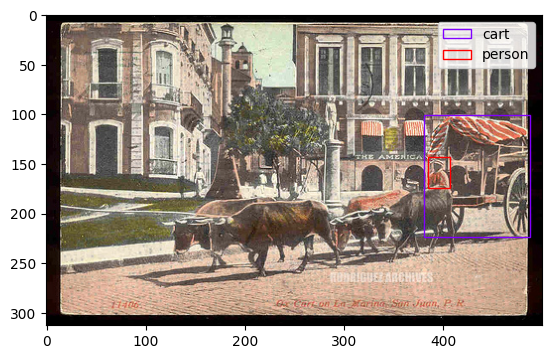

In [5]:
showLabeledImg("dataset/labeled_data/training/", 1)

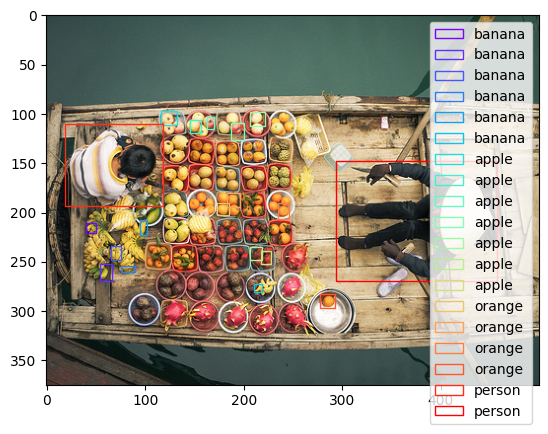

In [6]:
showLabeledImg("dataset/labeled_data/training/", 16529)